In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from gurobipy import Model, GRB, quicksum

In [2]:
yf.__version__

'0.2.54'

In [61]:
import yfinance as yf
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.poolmanager import PoolManager
import ssl

class UnsafeAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        ctx = ssl.create_default_context()
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE
        kwargs['ssl_context'] = ctx
        return super().init_poolmanager(*args, **kwargs)

s = requests.Session()
s.mount('https://', UnsafeAdapter())

In [67]:
import yfinance as yf

In [3]:
yf.__version__

'0.2.59'

In [51]:
import time

In [2]:
data = yf.download("AAPL", start = "2025-01-01", end = "2025-05-06", auto_adjust=False)["Adj Close"]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: C:\\Users\\채민석\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Data

In [41]:
import requests
from bs4 import BeautifulSoup

def get_top_nasdaq_tickers(n=50):
    url = "https://finance.yahoo.com/screener/predefined/ms_technology"
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # 티커가 포함된 table 행 추출
    rows = soup.select("table tbody tr")
    tickers = []

    for row in rows[:n]:
        ticker = row.select_one("td:nth-of-type(1) a")
        if ticker:
            tickers.append(ticker.text.strip())

    return tickers

# 시총 상위 50개 ticker 불러오기
tickers = get_top_nasdaq_tickers(50)
print(tickers)

# 데이터 예시 조회
data = yf.download(tickers, start="2023-01-01", end="2024-01-01", auto_adjust=False)["Adj Close"]
print(data.head())

['MSFT  Microsoft Corporation', 'AAPL  Apple Inc.', 'NVDA  NVIDIA Corporation', 'AVGO  Broadcom Inc.', 'ORCL  Oracle Corporation', 'PLTR  Palantir Technologies Inc.', 'CRM  Salesforce, Inc.', 'CSCO  Cisco Systems, Inc.', 'IBM  International Business Machines Corporation', 'NOW  ServiceNow, Inc.', 'VGT  Vanguard Information Tech ETF', 'XLK  SPDR Select Sector Fund - Techn', 'SMH  VanEck Semiconductor ETF', 'IYW  iShares U.S. Technology ETF', 'FTEC  Fidelity MSCI Information Techn', 'VITAX  Vanguard Information Technology', 'FDYZX  Franklin DynaTech Fund Class Ad', 'FDYNX  Franklin Dynatech Fund Class C', 'FDNRX  Franklin Dynatech Fd Cl R', 'FDTRX  Franlin DynaTech Fund Cl R6']


Failed to get ticker 'AAPL  APPLE INC.' reason: Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\certifi\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
Failed to get ticker 'FTEC  FIDELITY MSCI INFORMATION TECHN' reason: Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\certifi\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
Failed to get ticker 'VITAX  VANGUARD INFORMATION TECHNOLOGY' reason: Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz

Empty DataFrame
Columns: [AAPL  APPLE INC., AVGO  BROADCOM INC., CRM  SALESFORCE, INC., CSCO  CISCO SYSTEMS, INC., FDNRX  FRANKLIN DYNATECH FD CL R, FDTRX  FRANLIN DYNATECH FUND CL R6, FDYNX  FRANKLIN DYNATECH FUND CLASS C, FDYZX  FRANKLIN DYNATECH FUND CLASS AD, FTEC  FIDELITY MSCI INFORMATION TECHN, IBM  INTERNATIONAL BUSINESS MACHINES CORPORATION, IYW  ISHARES U.S. TECHNOLOGY ETF, MSFT  MICROSOFT CORPORATION, NOW  SERVICENOW, INC., NVDA  NVIDIA CORPORATION, ORCL  ORACLE CORPORATION, PLTR  PALANTIR TECHNOLOGIES INC., SMH  VANECK SEMICONDUCTOR ETF, VGT  VANGUARD INFORMATION TECH ETF, VITAX  VANGUARD INFORMATION TECHNOLOGY, XLK  SPDR SELECT SECTOR FUND - TECHN]
Index: []


In [49]:
tickers

['AAPL',
 'MSFT',
 'GOOGL',
 'AMZN',
 'NVDA',
 'META',
 'TSLA',
 'PEP',
 'AVGO',
 'ADBE',
 'COST',
 'CSCO',
 'NFLX',
 'INTC',
 'AMD',
 'TXN',
 'AMAT',
 'QCOM',
 'ISRG',
 'VRTX',
 'REGN',
 'ADI',
 'GILD',
 'INTU',
 'LRCX',
 'MDLZ',
 'PANW',
 'MU',
 'BKNG',
 'ASML',
 'CRWD',
 'ADP',
 'CDNS',
 'KDP',
 'MAR',
 'MELI',
 'MNST',
 'KLAC',
 'WDAY',
 'SIRI',
 'ZS',
 'ROST',
 'PAYX',
 'FTNT',
 'CTAS',
 'PCAR',
 'CHKP',
 'IDXX',
 'DXCM',
 'EA']

In [50]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'PEP', 'AVGO', 'ADBE',
    'COST', 'CSCO', 'NFLX', 'INTC', 'AMD', 'TXN', 'AMAT', 'QCOM', 'ISRG', 'VRTX',
    'REGN', 'ADI', 'GILD', 'INTU', 'LRCX', 'MDLZ', 'PANW', 'MU', 'BKNG', 'ASML',
    'CRWD', 'ADP', 'CDNS', 'KDP', 'MAR', 'MELI', 'MNST', 'KLAC', 'WDAY', 'SIRI',
    'ZS', 'ROST', 'PAYX', 'FTNT', 'CTAS', 'PCAR', 'CHKP', 'IDXX', 'DXCM', 'EA'] #"NVDA"

def get_prices(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, auto_adjust=False)['Adj Close']
    return data.dropna()

prices_1yr = get_prices(tickers, "2024-04-15", "2025-04-20")
prices_3yr = get_prices(tickers, "2022-04-15", "2025-04-20")

[*********************100%***********************]  50 of 50 completed

50 Failed downloads:
['AMZN', 'CTAS', 'MAR', 'SIRI', 'AAPL', 'ADBE', 'CSCO', 'MDLZ', 'PANW', 'ADI', 'MU', 'MELI', 'TSLA', 'PEP', 'AMAT', 'PCAR', 'DXCM', 'REGN', 'GILD', 'MSFT', 'EA', 'NFLX', 'KLAC', 'COST', 'ZS', 'PAYX', 'WDAY', 'FTNT', 'IDXX', 'AMD', 'ISRG', 'AVGO', 'BKNG', 'CDNS', 'ROST', 'GOOGL', 'QCOM', 'TXN', 'VRTX', 'ASML', 'ADP', 'MNST', 'META', 'CHKP', 'KDP', 'LRCX', 'CRWD', 'INTC', 'NVDA', 'INTU']: SSLError('Failed to perform, curl: (77) error setting certificate verify locations:  CAfile: C:\\Users\\채민석\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\certifi\\cacert.pem CApath: none. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  50 of 50 completed

50 Failed downloads:
['AMZN', 'CTAS', 'MAR', 'SIRI', 'AAPL', 'ADBE', 'CSCO', 'MDLZ', 'PANW', '

In [44]:
returns_1yr = prices_1yr.pct_change().dropna()
cum_returns_1yr = returns_1yr.cumsum()
returns_3yr = prices_3yr.pct_change().dropna()
cum_returns_3yr = returns_3yr.cumsum()

In [45]:
cum_returns_1yr

Ticker,AAPL,ADBE,ADI,ADP,AMAT,AMD,AMZN,ASML,AVGO,BKNG,...,PEP,QCOM,REGN,ROST,SIRI,TSLA,TXN,VRTX,WDAY,ZS
Date,,,,,,,,,,,,,,,,,,,,,


In [162]:
cum_returns_3yr

Ticker,AAPL,AMZN,GOOGL,JPM,META,MSFT,NVDA,UNH,XOM
Date,,,,,,,,,
2022-04-19,0.014115,0.034889,0.018269,0.020707,0.031029,0.017040,0.019052,0.006778,-0.008922
2022-04-20,0.013100,0.008848,0.003124,0.024215,-0.046694,0.020755,-0.013204,0.022233,-0.006643
2022-04-21,0.008256,-0.028179,-0.022068,0.016463,-0.108315,0.001374,-0.073673,0.006537,-0.017216
2022-04-22,-0.019565,-0.054788,-0.063561,-0.012259,-0.129371,-0.022770,-0.106770,-0.024164,-0.039047
2022-04-25,-0.012828,-0.042844,-0.034820,-0.012575,-0.113728,0.001643,-0.086939,-0.017771,-0.072760
...,...,...,...,...,...,...,...,...,...
2025-04-11,0.327195,0.403095,0.375548,0.786914,1.276734,0.463095,2.098872,0.255485,0.364060
2025-04-14,0.349249,0.388220,0.387830,0.780648,1.254492,0.461447,2.096889,0.234783,0.366484
2025-04-15,0.347373,0.374328,0.370479,0.773874,1.235752,0.456084,2.110347,0.228872,0.363679


In [199]:
x_min = 0.002
x_max = 0.8

Max DrawDown

In [332]:
def maxdd_model(y, gamma, x_min, x_max):
    """
    y : (T×N) ‑ DataFrame, t‑시점까지 **누적** 수익률
    gamma : 허용 최대 드로우다운 (y 단위와 같아야 함)
    """
    T, N = y.shape
    m = Model("MaxRet_MaxDD")

    # 1) 의사결정변수
    x = m.addVars(N, lb=x_min, ub=x_max, vtype=GRB.CONTINUOUS, name="x")   # 포트폴리오 비중
    u = m.addVars(T, vtype=GRB.CONTINUOUS, name="u")                       # running max

    # 2) 누적수익식 w_t 와 제약
    for t in range(T):
        w_t = quicksum(x[i] * y.iloc[t, i] for i in range(N))              # (선형식)

        m.addConstr(u[t] >= w_t,           name=f"u_ge_w_{t}")             # u_t ≥ w_t
        if t > 0:
            m.addConstr(u[t] >= u[t-1],    name=f"u_ge_prev_{t}")          # u_t ≥ u_{t-1}

        m.addConstr(u[t] - w_t <= gamma,   name=f"dd_bound_{t}")           # DD ≤ γ

    # 3) 예산(레버리지 금지)
    m.addConstr(quicksum(x[i] for i in range(N)) == 1, name="budget")

    # 4) 목적함수 – 연환산 수익률 최대화
    mu = (1 + y.iloc[-1]) ** (252 / T) - 1        # 벡터(길이 N)
    m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)

    m.update()
    return m, x, u 

In [1]:
x_min = 0.01
x_max = 0.8

In [385]:
y = returns_3yr
model, x_var, u_var = maxdd_model(y, 0.08, x_min, x_max)
model.optimize()

# 1) 최적 비중 벡터
x_opt = np.array([x_var[i].X for i in range(len(x_var))])

# 2) 누적수익 시계열 (numpy 계산)
w_vals = y.values @ x_opt                 # shape (T,)

# 3) running max, drawdown
u_vals = np.maximum.accumulate(w_vals)    # 벡터
dd_vals = u_vals - w_vals                 # 벡터

max_dd = dd_vals.max()

print(f"Max DD (actual) = {max_dd:.4f}")

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2259 rows, 803 columns and 78146 nonzeros
Model fingerprint: 0x19948d9e
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [3e-05, 1e-02]
  Bounds range     [1e-03, 8e-01]
  RHS range        [8e-02, 1e+00]
Presolve removed 1399 rows and 13 columns
Presolve time: 0.03s
Presolved: 860 rows, 1528 columns, 41647 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier performed 0 iterations in 0.04 seconds (0.05 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
     386    7.1068717e-03   0.000000e+00   0.000000

C:\Users\채민석\AppData\Local\Temp\ipykernel_11492\4036105114.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


In [12]:
model.computeIIS()
model.write("infeasible_model.ilp") 

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 20 logical processors, using up to 20 threads


IIS computed: 1 constraints and 10 bounds
IIS runtime: 0.00 seconds (0.00 work units)


Average DrawDown

In [369]:
def avgdd_model(y, gamma, x_min, x_max):
    """
    y : (T×N) pandas.DataFrame - 각 자산의 시점별 누적 수익률
    gamma : 허용 가능한 평균 드로우다운 (예: 0.15 = 15%)
    """

    T, N = y.shape
    model = Model("Maximize_Return_with_AvgDD_Constraint")

    # 1. 변수 정의
    x = model.addVars(N, lb=x_min, ub=x_max, vtype=GRB.CONTINUOUS, name="x")  # 포트폴리오 비중
    u = model.addVars(T, vtype=GRB.CONTINUOUS, name="u")                      # running max at t

    # 2. drawdown 제약조건 및 정의
    avgdd_expr = 0
    for t in range(T):
        w_t = quicksum(x[i] * y.iloc[t, i] for i in range(N))                # w_t = xᵗ y_t

        model.addConstr(u[t] >= w_t, name=f"u_ge_w_{t}")                     # u_t ≥ w_t
        if t > 0:
            model.addConstr(u[t] >= u[t - 1], name=f"u_monotone_{t}")       # u_t ≥ u_{t-1}

        avgdd_expr += u[t] - w_t                                            # D_t = u_t - w_t

    # 3. 평균 드로우다운 제약 (논문 기준)
    model.addConstr((1 / T) * avgdd_expr <= gamma, name="avgdd_bound")

    # 4. 예산 제약
    model.addConstr(quicksum(x[i] for i in range(N)) == 1, name="budget")

    # 5. 목적함수: annualized return 최대화
    mu = (1 + y.iloc[-1]) ** (252 / T) - 1   # 연환산 수익률
    model.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)

    model.update()
    return model, x, u

In [306]:
x_min = 0.01
x_max = 0.2

In [387]:
y = returns_3yr
model, x_var, u_var = avgdd_model(y, 0.03, x_min, x_max)
model.optimize()

# 1) 최적 비중 벡터
x_opt = np.array([x_var[i].X for i in range(len(x_var))])

# 2) 누적수익 시계열 (numpy 계산)
w_vals = y.values @ x_opt                 # shape (T,)

# 3) running max, drawdown
u_vals = np.maximum.accumulate(w_vals)    # 벡터
dd_vals = u_vals - w_vals                 # 벡터

avg_dd = dd_vals.mean()

print(f"Avg DD (actual) = {avg_dd:.4f}")

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 1507 rows, 803 columns and 40653 nonzeros
Model fingerprint: 0x0de2a90d
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [3e-05, 1e-02]
  Bounds range     [1e-03, 8e-01]
  RHS range        [3e-02, 1e+00]
Presolve removed 703 rows and 12 columns
Presolve time: 0.02s
Presolved: 804 rows, 791 columns, 42726 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier performed 0 iterations in 0.03 seconds (0.02 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
     148    7.2498053e-03   0.000000e+00   0.000000e+00

C:\Users\채민석\AppData\Local\Temp\ipykernel_11492\2741373084.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


In [374]:
print(f"Optimal Weights  = {x_opt}")
print(f"Sum of Weights   = {x_opt.sum():.4f}")

Optimal Weights  = [0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.32670796 0.001      0.001      0.001      0.001      0.26915621
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.001      0.001
 0.001      0.001      0.001      0.001      0.21016398 0.001
 0.14797184 0.001      0.001      0.001      0.001      0.001
 0.001      0.001     ]
Sum of Weights   = 1.0000


In [372]:
dd_vals.mean()

np.float64(0.023461343157071858)

CDaR

In [395]:
def cdar_model(y, gamma, alpha, x_min, x_max):
    """
    y     : (T×N) DataFrame, t‑시점까지 누적수익률
    gamma : 허용 최대 CDaR
    alpha : 신뢰수준 (ex. 0.95)
    """
    T, N = y.shape
    m = Model("MaxRet_CDaR")

    # 1) 의사결정변수
    x  = m.addVars(N, lb=x_min, ub=x_max, vtype=GRB.CONTINUOUS, name="x")   # 비중
    u  = m.addVars(T, vtype=GRB.CONTINUOUS, name="u")                       # running max
    z0 = m.addVar(vtype=GRB.CONTINUOUS, name="z0")                          # 스칼라 z
    z  = m.addVars(T, lb=0.0, vtype=GRB.CONTINUOUS, name="z")               # 벡터 z_k

    # 2) running max, drawdown, 초과분 z_k
    for t in range(T):
        w_t = quicksum(x[i] * y.iloc[t, i] for i in range(N))               # 누적수익 w_t

        m.addConstr(u[t] >= w_t,          name=f"u_ge_w_{t}")
        if t > 0:
            m.addConstr(u[t] >= u[t-1],   name=f"u_monotone_{t}")

        m.addConstr(z[t] >= u[t] - w_t - z0, name=f"z_excess_{t}")          # z_k ≥ DD - z0

    # u_0 = 0
    m.addConstr(u[0] == 0, name="u0_zero")

    # 3) CDaR 제약 :  z0 + 1/((1-α)T) Σ z_k ≤ γ
    cvar_factor = 1 / ((1 - alpha) * T)
    m.addConstr(z0 + cvar_factor * quicksum(z[t] for t in range(T)) <= gamma,
                name="cdar_bound")

    # 4) 예산 (레버리지 금지)
    m.addConstr(quicksum(x[i] for i in range(N)) == 1, name="budget")

    # 5) 목적함수 – 연환산 수익률 최대화
    mu = (1 + y.iloc[-1]) ** (252 / T) - 1
    m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)

    m.update()
    return m, x, u, z0, z

In [398]:
gamma = 0.15
alpha = 0.99
x_min = 0.001
x_max = 0.4
y = returns_1yr
model, x_var, u_var, z0_var, z_var = cdar_model(y, gamma, alpha,
                                                x_min, x_max)
model.optimize()

# 최적 비중
x_opt = np.array([x_var[i].X for i in range(len(x_var))])

# 실제 CDaR 계산 (검증용)
w_vals  = y.values @ x_opt
u_vals  = np.maximum.accumulate(w_vals)
dd_vals = u_vals - w_vals
threshold = z0_var.X
excess   = np.maximum(dd_vals - threshold, 0)
cdar = threshold + excess.mean() / (1 - alpha)

print(f"CDaR   = {cdar:.4f} (γ = {gamma})")
print(f"max DD = {dd_vals.max():.4f}")

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 761 rows, 557 columns and 27057 nonzeros
Model fingerprint: 0xbae5a339
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [9e-05, 3e-02]
  Bounds range     [1e-03, 4e-01]
  RHS range        [1e-01, 1e+00]
Presolve removed 220 rows and 4 columns
Presolve time: 0.01s
Presolved: 541 rows, 553 columns, 27817 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6214362e-02   3.075958e+00   0.000000e+00      0s
     240    2.4514633e-02   0.000000e+00   0.000000e+00      0s

Solved in 240 iterations and 0.02 seconds (0.02 work units)
Optimal objective  2.451463304e-02
CDaR   = 0.1415 (γ = 0.15)
max DD = 0.0930


C:\Users\채민석\AppData\Local\Temp\ipykernel_11492\690411516.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.setObjective(quicksum(x[i] * mu[i] for i in range(N)), GRB.MAXIMIZE)


In [8]:
import os
import certifi

print("인증서 경로 확인:", certifi.where())
os.environ['SSL_CERT_FILE'] = certifi.where()

인증서 경로 확인: C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\certifi\cacert.pem


In [15]:
aapl = pd.read_csv("AAPL 과거 데이터.csv")
price = aapl['Close']
log_ret = np.log(price / price.shift(1)).dropna()

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_ret) 
print(f"ADF: {result[0]}")
print(f"p-value: {result[1]}")

ADF 통계량: -9.661165474385305
p-value: 1.3523321429538302e-16


In [19]:
log_ret

1      0.007216
2     -0.011202
3      0.042361
4      0.008590
5     -0.022106
         ...   
265    0.005079
266    0.006089
267    0.003851
268   -0.038078
269   -0.031964
Name: Close, Length: 269, dtype: float64

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_ret, order=(1,0,1))  # 예시
fit = model.fit()
resid = fit.resid

C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

In [22]:
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(resid)
print("ARCH p-value:", arch_test[1])

ARCH p-value: 1.6332503598307592e-06


In [ ]:
from arch import arch_model

# ARIMA 잔차 사용
model_garch = arch_model(resid, vol='Garch', p=1, q=1)
fit_garch = model_garch.fit()
print(fit_garch.summary())

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 초기값
mu = fit_garch.params['mu']
omega = fit_garch.params['omega']
alpha = fit_garch.params['alpha[1]']
beta = fit_garch.params['beta[1]']

# 시뮬 파라미터
T = 252            # 1년 거래일
n_sim = 10000         # 시뮬레이션 횟수
S0 = price.iloc[-1]  # 현재 종가 기준

simulated_prices = np.zeros((T, n_sim))

for i in range(n_sim):
    eps = np.zeros(T)
    sigma2 = np.zeros(T)
    ret = np.zeros(T)
    
    # 초기값
    sigma2[0] = omega / (1 - alpha - beta)  # 장기 분산
    eps[0] = np.sqrt(sigma2[0]) * np.random.normal()
    ret[0] = mu + eps[0]
    
    # GARCH 시뮬루프
    for t in range(1, T):
        sigma2[t] = omega + alpha * eps[t-1]**2 + beta * sigma2[t-1]
        eps[t] = np.sqrt(sigma2[t]) * np.random.normal()
        ret[t] = mu + eps[t]
    
    # 누적 로그수익률 → 가격 경로
    price_path = S0 * np.exp(np.cumsum(ret))
    simulated_prices[:, i] = price_path

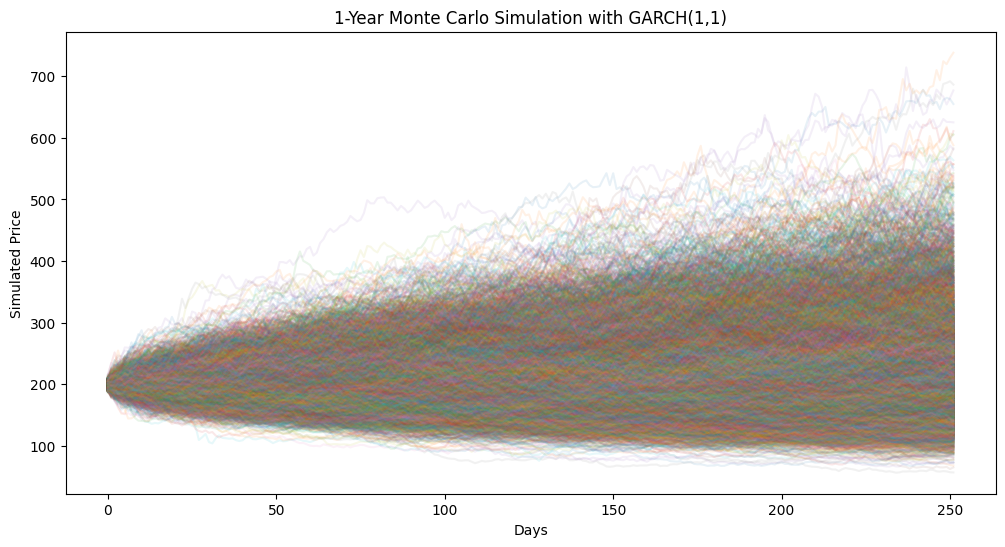

In [34]:
plt.figure(figsize=(12,6))
plt.plot(simulated_prices, alpha=0.1)
plt.title("1-Year Monte Carlo Simulation with GARCH(1,1)")
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA
arma_model = ARIMA(log_ret, order=(1, 0, 1))
arma_fit = arma_model.fit()
resid = arma_fit.resid

phi = arma_fit.params['ar.L1']
theta = arma_fit.params['ma.L1']
mu = arma_fit.params['const']

C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, foreca

In [36]:
from arch import arch_model
garch_model = arch_model(resid, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

omega = garch_fit.params['omega']
alpha = garch_fit.params['alpha[1]']
beta = garch_fit.params['beta[1]']

Iteration:      1,   Func. Count:      6,   Neg. LLF: 55552793.163381174
Iteration:      2,   Func. Count:     16,   Neg. LLF: -697.0449737015965
Optimization terminated successfully    (Exit mode 0)
            Current function value: -697.0449739386108
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


C:\Users\채민석\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004097. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [37]:
T = 252
n_sim = 10000
S0 = price.iloc[-1]

simulated_prices = np.zeros((T, n_sim))

for i in range(n_sim):
    eps = np.zeros(T)
    sigma2 = np.zeros(T)
    ret = np.zeros(T)
    
    sigma2[0] = omega / (1 - alpha - beta)
    eps[0] = np.sqrt(sigma2[0]) * np.random.normal()
    ret[0] = mu + eps[0]
    
    for t in range(1, T):
        sigma2[t] = omega + alpha * eps[t-1]**2 + beta * sigma2[t-1]
        eps[t] = np.sqrt(sigma2[t]) * np.random.normal()
        ret[t] = mu + phi * ret[t-1] + theta * eps[t-1] + eps[t]
    
    price_path = S0 * np.exp(np.cumsum(ret))
    simulated_prices[:, i] = price_path


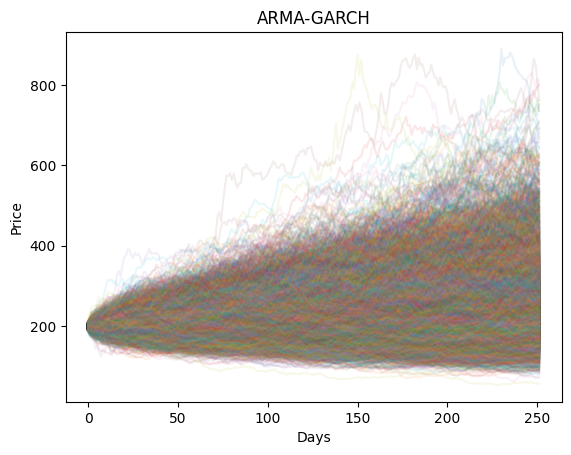

In [40]:
import matplotlib.pyplot as plt
plt.plot(simulated_prices, alpha=0.1)
plt.title("ARMA-GARCH")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()